# Hand Position

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA


### Loading the data

In [2]:
spontan1 = pd.read_csv('Training/spontan/Evyatar636771052727603804Spontan.csv')
spontan2 = pd.read_csv('Training/spontan/Nofar636759795182793299Spontan.csv')
spontan3 = pd.read_csv('Training/spontan/Oriya636759804404113837Spontan.csv')
spontan4 = pd.read_csv('Training/spontan/OryaB636771083605535985Spontan.csv')
spontan5 = pd.read_csv('Training/spontan/Revital636770957038873193Spontan.csv')
spontan6 = pd.read_csv('Training/spontan/Sachar636771045591258071Spontan.csv')
spontan7 = pd.read_csv('Training/spontan/Shelly636759787508979097Spontan.csv')
spontan8 = pd.read_csv('Training/spontan/Yael636771059544754823Spontan.csv')
spontan9 = pd.read_csv('Training/spontan/Yoel636760921663075813Spontan.csv')

In [3]:
sync1 = pd.read_csv('Training/synchron/Evyatar636771053639929594Sync.csv')
sync2 = pd.read_csv('Training/synchron/Nofar636759797397919664Sync.csv')
sync3 = pd.read_csv('Training/synchron/Oriya636759806131350399Sync.csv')
sync4 = pd.read_csv('Training/synchron/OryaB636771084494502229Sync.csv')
sync5 = pd.read_csv('Training/synchron/Revital636770957894370062Sync.csv')
sync6 = pd.read_csv('Training/synchron/Sachar636771046527112972Sync.csv')
sync7 = pd.read_csv('Training/synchron/Shelly636759789526313406Sync.csv')
sync8 = pd.read_csv('Training/synchron/Yael636771060699529085Sync.csv')
sync9 = pd.read_csv('Training/synchron/Yoel636760923490742912Sync.csv')


In [4]:
alone1 = pd.read_csv('Training/alone/Evyatar636771054555711409Alone.csv')
alone2 = pd.read_csv('Training/alone/Nofar636759796290435160Alone.csv')
alone3 = pd.read_csv('Training/alone/Oriya636759805268396661Alone.csv')
alone4 = pd.read_csv('Training/alone/OryaB636771082736601528Alone.csv')
alone5 = pd.read_csv('Training/alone/Revital636770955999435879Alone.csv')
alone6 = pd.read_csv('Training/alone/Sachar636771047408504303Alone.csv')
alone7 = pd.read_csv('Training/alone/Shelly636759788383205274Alone.csv')
alone8 = pd.read_csv('Training/alone/Yael636771061659067649Alone.csv')
alone9 = pd.read_csv('Training/alone/Yoel636760922573364655Alone.csv')

In [5]:
HandRight = pd.read_csv('HandRight.csv')
HandRight.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Yaw,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength
0,128.2883,15478,right,1,15.67167,226.2064,20.26470,34.26665,-195.214700,-35.043020,...,-0.277800,46.88831,207.3548,86.23589,203.8337,49.33507,237.4553,0.0,0.206389,0.0
1,128.3048,15480,right,1,16.24119,222.9389,20.11781,36.16443,-180.093900,-4.052799,...,-0.277763,47.54861,205.6568,86.42250,203.9553,47.88272,238.4482,0.0,0.243050,0.0
2,128.3218,15482,right,1,16.72461,220.9709,19.94972,26.35298,-95.088190,-11.157620,...,-0.278792,48.15030,204.5182,86.35149,204.6231,45.35921,236.8544,0.0,0.281134,0.0
3,128.3384,15484,right,1,17.09016,219.7124,19.67679,19.46804,-61.755180,-21.303780,...,-0.279768,48.64175,203.9989,86.16056,204.9939,44.18692,236.0927,0.0,0.277691,0.0
4,128.3551,15486,right,1,17.46017,219.3652,19.13128,21.94964,-8.355943,-35.081790,...,-0.278629,48.93135,203.3777,85.59017,204.5952,42.68003,235.2896,0.0,0.283008,0.0


### setting the data

In [6]:
def setData(df):
    
    #combine left & right frames to one row:
    right = df[df[' Hand Type'] == 'right'].drop(' Hand Type', axis=1).drop(' Frame ID', axis=1)
    left =  df[df[' Hand Type'] == 'left'].drop(' Hand Type', axis=1).drop(' Frame ID', axis=1)
    right.reset_index(inplace=True)
    left.reset_index(inplace=True)
    right.columns += '_r'
    left.columns += '_l'
    new = pd.concat([right,left], axis=1)
    new2 =pd.concat([new[400::10],new[401::10],new[402::10]], axis=0)
    
    return helper(new2)

In [7]:
def setDataAlone(df):
    
    #combine left & right frames to one row:
    right = HandRight.drop(' Hand Type', axis=1).drop(' Frame ID', axis=1)
    left =  df.drop(' Hand Type', axis=1).drop(' Frame ID', axis=1)
    right.reset_index(inplace=True)
    left.reset_index(inplace=True)
    right.columns += '_r'
    left.columns += '_l'
    new = pd.concat([right,left], axis=1)
    new2 =pd.concat([new[400::10],new[401::10],new[402::10]], axis=0)
    
    return helper(new2)

In [8]:
#split the data to 3 for combine 3 frames represent half a second:

def helper (df):
    temp1 = df[::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp2 = df[1::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp3 = df[2::3].drop('Time_r',axis=1 ).drop('Time_l',axis=1 )
    temp1.reset_index(inplace=True)
    temp2.reset_index(inplace=True)
    temp3.reset_index(inplace=True)
    temp1.columns += "_1"
    temp2.columns += "_2"
    temp3.columns += "_3"
    new = pd.concat([temp1 ,temp2, temp3], axis=1).drop('index_1', axis=1).drop('index_2', axis=1).drop('index_3', axis=1).drop('index_r_1', axis=1).drop('index_r_2', axis=1).drop('index_r_3', axis=1).drop('index_l_1', axis=1).drop('index_l_2', axis=1).drop('index_l_3', axis=1)
    return new

In [9]:
spontan1_new = setData(spontan1)
spontan2_new = setData(spontan2)
spontan3_new = setData(spontan3)
spontan4_new = setData(spontan4)
spontan5_new = setData(spontan5)
spontan6_new = setData(spontan6)
spontan7_new = setData(spontan7)
spontan8_new = setData(spontan8)
spontan9_new = setData(spontan9)
spontan1_new

,# hands_r_1,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,2,155.9359,208.1284,-31.21712,-7.383640,-21.33287,10.729240,0.711794,-0.223330,-0.492625,...,1.423037,-157.1487,149.38500,-0.618898,-346.6033,-15.103640,18.492440,0.000000,1.848656,0.000000
1,2,152.2292,202.9817,-38.93669,-54.424640,-12.95077,-59.022220,0.423059,-0.202610,-0.671734,...,1.462609,-182.0708,246.31910,-43.225910,-341.2279,51.422580,-45.801470,0.000000,0.604686,0.000000
2,2,137.9564,218.0768,-50.62793,-86.060680,249.16450,-53.437310,-0.166540,0.094672,-0.966643,...,1.177055,-158.5114,203.69530,2.489781,-326.3594,61.280860,124.570900,0.000000,0.880775,0.000000
3,2,133.7394,203.2745,-43.36188,-1.947313,-180.81940,30.110430,-0.303800,0.077965,-1.141567,...,1.603383,-148.1970,112.13250,-9.837838,-388.5125,44.977680,23.752270,0.000000,1.273378,0.000000
4,2,137.3772,223.3892,-53.89438,105.609500,237.77940,103.531800,0.539820,-0.201573,-0.924800,...,1.554989,-186.6472,173.32750,-3.301782,-364.8102,-3.374418,-23.892280,0.369080,1.344474,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2,122.6834,306.5341,-41.47635,47.902100,508.53750,58.921860,0.935821,-0.580744,-0.782863,...,1.450034,-145.4945,90.98325,55.297280,-362.7469,-18.927880,90.092350,0.000000,0.117480,0.000000
409,2,127.7196,205.6805,-28.82113,-60.682290,-284.75700,-3.183362,0.187868,-0.345170,-0.203957,...,1.174199,-152.1578,153.36140,33.538330,-390.6072,99.927060,7.192961,0.896132,1.903579,1.000000
410,2,138.3531,339.6367,-15.39577,59.475700,181.51530,70.514950,0.910747,-0.515148,-0.355658,...,1.311606,-168.0458,153.40230,15.624570,-305.6251,-49.775950,29.695370,0.000000,1.033350,0.000000
411,2,136.1530,223.3871,-33.01790,-107.654000,-88.08487,-66.518630,0.787340,-0.652436,-0.482716,...,1.424348,-164.7706,116.00480,44.298840,-300.1183,-88.631150,29.718390,0.000000,0.706513,0.066154


In [10]:
sync1_new = setData(sync1)
sync2_new = setData(sync2)
sync3_new = setData(sync3)
sync4_new = setData(sync4)
sync5_new = setData(sync5)
sync6_new = setData(sync6)
sync7_new = setData(sync7)
sync8_new = setData(sync8)
sync9_new = setData(sync9)

sync1_new

,# hands_r_1,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,2,71.94101,251.4637,-6.907072,53.091940,-40.25596,97.66138,0.658722,-1.646524,-0.170360,...,0.546841,-110.49300,223.7677,42.10865,-255.4824,22.60431,44.076510,0.0,0.000000,0.0
1,2,115.45030,208.8553,73.208280,-124.844600,-161.77310,83.72779,0.895653,-1.411911,-0.374659,...,1.397060,-137.64040,120.9963,63.44971,-303.6956,-63.16230,61.494080,0.0,0.000000,0.0
2,2,28.09907,196.1127,66.696390,-169.509200,108.62330,-72.66647,1.153516,-1.534858,-0.394824,...,1.239161,-222.56710,177.1946,42.22416,-322.7169,-49.65889,42.229520,0.0,0.000000,0.0
3,2,-58.56152,242.0672,52.675370,-9.174218,19.55542,20.98059,1.156664,-1.475011,-0.489461,...,1.059245,-134.42960,194.7682,57.40747,-270.2995,-12.67145,58.243930,0.0,0.000000,0.0
4,2,117.45010,220.9867,40.628610,491.166600,-237.68460,-47.95924,1.099921,-1.391134,-0.434181,...,1.124206,-47.36527,155.4832,51.55155,-248.2692,11.54979,31.221000,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,2,118.14870,210.8634,153.277800,-66.161990,-100.04850,127.51140,1.956078,-1.218917,-2.383795,...,2.074002,-132.05700,154.5669,71.74404,-305.6773,-16.60806,6.903108,0.0,0.000000,0.0
409,2,128.30720,217.6384,102.614400,-13.839850,-55.46097,-210.75640,1.163967,-1.396786,-0.721135,...,0.886262,-126.96010,131.8572,54.23330,-349.3086,21.44941,9.283110,0.0,0.087991,0.0
410,2,121.54640,198.3387,63.578330,148.636400,157.17250,191.92270,0.693786,-1.763640,-0.574998,...,1.504783,-143.00860,175.7696,72.89594,-346.0262,27.09764,54.736660,0.0,0.014903,0.0
411,2,114.55990,205.2793,156.739200,-58.783780,-44.24956,-94.46384,1.937684,-1.241404,-2.299070,...,1.672499,-154.38500,101.3325,93.10945,-320.4811,-88.56555,92.866440,0.0,0.140191,0.0


In [11]:
alone1_new = setDataAlone(alone1)
alone2_new = setDataAlone(alone2)
alone3_new = setDataAlone(alone3)
alone4_new = setDataAlone(alone4)
alone5_new = setDataAlone(alone5)
alone6_new = setDataAlone(alone6)
alone7_new = setDataAlone(alone7)
alone8_new = setDataAlone(alone8)
alone9_new = setDataAlone(alone9)

alone2_new

,# hands_r_1,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,...,Yaw_l_3,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3
0,1,4.446011,239.7163,7.214328,65.369930,-429.516700,-52.87744,0.141979,-0.006587,-0.949935,...,1.766450,-93.14972,247.2314,31.190850,-299.2039,110.08510,-38.949710,0.571452,2.546834,0.072133
1,1,9.759008,151.3201,-4.327604,-46.536010,-67.596130,-106.04750,-0.289657,0.176762,-0.865124,...,1.541197,-83.43033,103.9663,6.786192,-340.4403,93.67231,1.591831,0.000000,0.875465,0.000000
2,1,-7.348337,270.6730,-4.626692,6.725562,-188.174600,59.26298,0.168860,-0.073883,-0.785574,...,1.655295,-84.21605,203.5038,12.572340,-307.3401,80.86944,-24.475670,0.000000,0.958193,0.000000
3,1,-6.920549,183.3948,-9.706382,0.680243,-303.663800,135.70700,-0.080909,0.039870,-0.790196,...,1.525567,-82.54382,186.6201,26.403830,-325.0397,112.55510,-15.904560,0.000000,0.000000,0.000000
4,1,13.216970,124.3669,34.967890,19.565940,-321.822100,72.52114,-0.156647,0.088060,-0.654787,...,1.922988,-85.94032,149.9715,155.898400,-323.5967,85.23740,82.823830,0.000000,0.015172,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,1,0.815705,209.6899,-10.792580,-115.595400,-4.467873,89.77375,0.473223,0.579208,-0.023089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
438,1,-18.922190,149.0452,-0.983002,-196.860900,-1360.551000,104.44910,-0.150978,-0.058372,-0.089673,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
439,1,-19.837060,266.2280,8.367677,35.815910,-1402.998000,-212.01620,0.322127,0.016442,-0.132688,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,1,37.485670,328.1625,38.908720,553.217300,-200.523900,179.99720,0.729167,-1.716032,0.412734,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### adding a label column:

In [12]:
spontan1_new['label'] = 1
spontan2_new['label'] = 1
spontan3_new['label'] = 1
spontan4_new['label'] = 1
spontan5_new['label'] = 1
spontan6_new['label'] = 1
spontan7_new['label'] = 1
spontan8_new['label'] = 1
spontan9_new['label'] = 1

In [13]:
sync1_new['label'] = 2
sync2_new['label'] = 2
sync3_new['label'] = 2
sync4_new['label'] = 2
sync5_new['label'] = 2
sync6_new['label'] = 2
sync7_new['label'] = 2
sync8_new['label'] = 2
sync9_new['label'] = 2

In [14]:
alone1_new['label'] = 3
alone2_new['label'] = 3
alone3_new['label'] = 3
alone4_new['label'] = 3
alone5_new['label'] = 3
alone6_new['label'] = 3
alone7_new['label'] = 3
alone8_new['label'] = 3
alone9_new['label'] = 3

### combine all the data-frames to big data

In [15]:
hands_arr = [alone1_new, alone2_new, alone3_new, alone4_new, alone5_new, alone6_new, alone7_new, alone8_new, alone9_new,
       sync1_new, sync2_new, sync3_new, sync4_new, sync5_new, sync6_new, sync7_new, sync8_new, sync9_new,
       spontan1_new, spontan2_new, spontan3_new, spontan4_new, spontan5_new, spontan6_new, spontan7_new, spontan8_new, spontan9_new]
hands = pd.concat(hands_arr, axis=0)

from sklearn.utils import shuffle
hands = shuffle(hands)
hands.reset_index(inplace=True)
hands = hands.drop('index', axis=1)
hands

,# hands_r_1,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,...,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3,label
0,1.0,113.572200,186.0197,-46.37872,17.49757,-44.12941,-28.79157,0.895485,-0.336903,-1.314662,...,-132.13890,120.2494,54.54700,-280.6939,-76.52318,50.383610,0.000000,0.026268,0.000000,2
1,2.0,156.094100,230.0708,141.24010,18.26761,68.26760,-309.93540,1.752063,-1.044539,-1.842321,...,-173.59610,214.6706,105.37600,-397.3346,102.33690,42.516350,0.000000,0.588842,0.000000,1
2,1.0,-0.293967,210.2925,-24.55674,60.36980,69.61176,92.34079,0.858590,-0.360750,-0.325377,...,-78.71761,186.5113,98.73316,-199.2024,31.13196,209.963000,0.000000,1.042198,0.519471,3
3,1.0,21.429370,200.3100,64.10194,96.30092,26.65018,-25.67317,0.674007,0.180621,-0.158699,...,-239.13250,269.1888,-60.92318,-336.6107,64.41950,43.211230,0.024198,1.635343,0.922028,3
4,2.0,108.773500,169.3332,67.05522,-13.96010,-24.68666,470.33250,-0.422757,0.079911,-1.336231,...,-148.52800,197.6311,74.29078,-314.5101,32.52597,96.284190,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10949,1.0,57.418900,306.5212,41.92640,-127.25990,652.70030,188.00210,0.807638,-2.291536,0.602660,...,-152.88620,191.4401,25.18391,-339.2109,22.54758,-10.776620,0.000000,0.268987,0.000000,3
10950,2.0,126.438300,211.3406,-15.62542,28.84274,449.31030,-71.00307,0.192472,-0.077812,-0.519986,...,-162.27560,141.9578,71.26994,-371.8943,42.08720,129.635200,0.000000,0.210218,0.000000,1
10951,2.0,91.053590,209.8752,38.16849,-175.57420,31.21273,37.10170,1.361606,-0.951835,-1.272507,...,-118.36250,113.9853,30.50372,-231.0321,-108.51760,3.017521,0.000000,0.000000,0.000000,2
10952,1.0,8.668410,237.5235,10.46785,-21.11329,67.81341,8.86731,1.408348,-1.292382,0.032522,...,-159.70800,429.8108,61.59919,-354.6992,287.15120,3.028958,0.000000,0.225825,0.000000,3


In [16]:
hands.isnull().sum()

 # hands_r_1            42
 Position X_r_1         42
 Position Y_r_1         42
 Position Z_r_1         42
 Velocity X_r_1         42
                      ... 
 Elbow Pos Z_l_3       579
 Grab Strenth_l_3      579
 Grab Angle_l_3        579
 Pinch Strength_l_3    579
label                    0
Length: 115, dtype: int64

In [17]:
hands = hands.dropna()

In [18]:
hands.isnull().values.any()

False

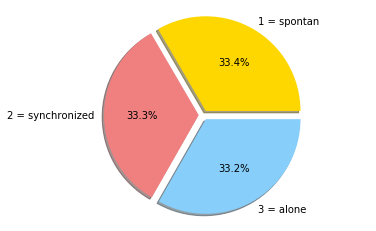

In [19]:
# lets look at the predict variable:

spontan = hands[hands['label']==1]['label'].count()
sync = hands[hands['label']==2]['label'].count()
alone = hands[hands['label']==3]['label'].count()


# Data to plot
labels = "1 = spontan", "2 = synchronized" , "3 = alone"
sizes = [spontan, sync , alone]
colors = ['gold', 'lightcoral', 'lightskyblue']
# 'lightcoral', 'lightskyblue']
explode = (0.05, 0.05, 0.05)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
autopct='%1.1f%%', shadow=True)

plt.axis('equal')
plt.show()

## loading the testing set


In [20]:
spontan_test1 = pd.read_csv('Validation/spontan/Itiel636770940701219076Spontan.csv')
spontan_test2 = pd.read_csv('Validation/spontan/Mor636771064635567065Spontan.csv')
spontan_test3 = pd.read_csv('Validation/spontan/Oded636754667262994505Spontan.csv')

In [21]:
sync_test1 = pd.read_csv('Validation/synchron/Itiel636770941638547912Sync.csv')
sync_test2 = pd.read_csv('Validation/synchron/Mor636771065531910215Sync.csv')
sync_test3 = pd.read_csv('Validation/synchron/Oded636754671560850581Sync.csv')

In [22]:
alone_test1 = pd.read_csv('Validation/alone/Itiel636770939529673940Alone.csv')
alone_test2 = pd.read_csv('Validation/alone/Mor636771066407626524Alone.csv')
alone_test3 = pd.read_csv('Validation/alone/Oded636754669540564461Alone.csv')

### setting the data

In [23]:
spontan_test1_new = setData(spontan_test1)
spontan_test2_new = setData(spontan_test2)
spontan_test3_new = setData(spontan_test3)

spontan_test1_new['label'] = 1
spontan_test2_new['label'] = 1
spontan_test3_new['label'] = 1

In [24]:
sync_test1_new = setData(sync_test1)
sync_test2_new = setData(sync_test2)
sync_test3_new = setData(sync_test3)

sync_test1_new['label'] = 2
sync_test2_new['label'] = 2
sync_test3_new['label'] = 2

In [25]:
alone_test1_new = setDataAlone(alone_test1)
alone_test2_new = setDataAlone(alone_test2)
alone_test3_new = setDataAlone(alone_test3)

alone_test1_new['label'] = 3
alone_test2_new['label'] = 3
alone_test3_new['label'] = 3

### combine all the data-frames to big data


In [26]:
hands_test_arr = [alone_test1_new, alone_test2_new, alone_test3_new,
       sync_test1_new, sync_test2_new, sync_test3_new,
       spontan_test1_new, spontan_test2_new, spontan_test3_new]
hands_test = pd.concat(hands_test_arr, axis=0)
from sklearn.utils import shuffle

hands_test = shuffle(hands_test)
hands_test.reset_index(inplace=True)
hands_test = hands_test.drop('index', axis=1)
hands_test

,# hands_r_1,Position X_r_1,Position Y_r_1,Position Z_r_1,Velocity X_r_1,Velocity Y_r_1,Velocity Z_r_1,Pitch_r_1,Roll_r_1,Yaw_r_1,...,Wrist Pos X_l_3,Wrist Pos Y_l_3,Wrist Pos Z_l_3,Elbow pos X_l_3,Elbow Pos Y_l_3,Elbow Pos Z_l_3,Grab Strenth_l_3,Grab Angle_l_3,Pinch Strength_l_3,label
0,2.0,149.222200,187.1457,-30.72359,51.472820,280.21170,-33.89020,0.087937,-0.044858,-0.553782,...,-133.4058,137.7338,47.00145,-313.8639,-7.780053,108.77390,0.000000,2.322170,0.285818,1
1,2.0,161.756600,231.7061,54.49480,-8.823672,29.08467,-19.45132,1.448499,-0.905107,-1.393236,...,-183.3780,220.3339,65.84474,-361.6933,42.488900,139.06050,0.000000,0.058625,0.000000,2
2,1.0,27.550410,232.7543,32.63120,322.758600,278.72130,125.84540,0.547952,0.189273,0.001501,...,-116.0213,116.8662,36.01695,-316.7990,9.706889,123.23020,0.000000,0.270912,0.000000,3
3,1.0,-16.419830,280.1294,202.81020,-98.000110,-38.99489,160.70180,1.093969,-0.497500,-0.259680,...,-119.6748,151.7875,29.24082,-271.4394,-37.715260,46.17671,0.000000,0.818131,0.000000,3
4,2.0,89.612140,234.5442,3.02981,-40.377650,222.88600,-62.04206,0.511969,-1.163792,-0.287330,...,-188.8392,143.4873,90.56163,-377.3609,71.137710,218.01140,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,1.0,12.554040,171.1068,63.23152,-87.029340,465.93800,-188.07070,0.494061,0.050658,-0.116504,...,-124.1652,268.0772,54.68209,-303.5168,92.875240,135.53210,0.746541,1.741783,0.145820,3
3336,2.0,178.304900,225.5920,22.08087,35.978550,60.19319,155.79110,0.896620,-0.748032,-0.484086,...,-151.9840,163.7582,69.86181,-304.8303,20.130580,228.76660,0.000000,1.120729,0.000000,1
3337,1.0,20.805540,318.8718,55.44110,-5.705703,472.09180,139.83300,0.368212,0.158327,-0.061956,...,-155.3986,176.0260,54.57336,-258.9259,-43.700230,65.28712,0.735301,2.379611,0.156688,3
3338,1.0,8.235908,217.7261,-20.45723,45.579160,301.66680,205.55900,1.064073,-0.565475,-0.208119,...,-161.7280,148.4671,26.76165,-387.3551,103.583100,103.35730,1.000000,3.141593,0.793186,3


In [27]:
hands_test.isnull().sum()

 # hands_r_1             1
 Position X_r_1          1
 Position Y_r_1          1
 Position Z_r_1          1
 Velocity X_r_1          1
                      ... 
 Elbow Pos Z_l_3       338
 Grab Strenth_l_3      338
 Grab Angle_l_3        338
 Pinch Strength_l_3    338
label                    0
Length: 115, dtype: int64

In [28]:
hands_test = hands_test.dropna()

In [29]:
hands_test.isnull().values.any()

False

### Split into X and y both training set and testing set

In [30]:
X_train = hands.drop('label',axis=1)
y_train = hands['label']
X_test = hands_test.drop('label',axis=1)
y_test = hands_test['label']

In [31]:
X_test.shape

(2953, 114)

### Random Forest without PCA:

In [32]:
#cros-validatoin:
rf = RandomForestClassifier(n_estimators=100)
score_rf = cross_val_score(rf, X_train, y_train, cv=5)
print (" train score:  ", score_rf.mean())

 train score:   0.978422910115493


In [33]:
rf.fit(X_train, y_train )
score_rf_test = rf.score(X_test, y_test)
print( "test score:  ", score_rf_test)

test score:   0.8763968845242127


In [34]:
y_pred_rf = rf.predict(X_test)
confMat_rf = confusion_matrix(y_test, y_pred_rf)
index = ['Actually spontan', 'Actually synchronized', 'Actually alone']
columns = ['Predicted as spontan', 'Predicted as synchronized', 'Predicted as alone']
confMat_rf_pd = pd.DataFrame(data =confMat_rf, index=index, columns=columns)
confMat_rf_pd


,Predicted as spontan,Predicted as synchronized,Predicted as alone
Actually spontan,962,27,0
Actually synchronized,338,641,0
Actually alone,0,0,985


### logstic regression without PCA:

In [35]:
lr = LogisticRegression()
score_lr = cross_val_score(lr, X_train, y_train, cv=5)
print ("train score:  ", score_rf.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' i

train score:   0.978422910115493


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
lr.fit(X_train, y_train )
score_lr_test = lr.score(X_test, y_test)
print( "test score:  ", score_lr_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


test score:   0.8794446325770403


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [37]:
y_pred_lr = lr.predict(X_test)
confMat_lr = confusion_matrix(y_test, y_pred_lr)
index = ['Actually spontan', 'Actually synchronized', 'Actually alone']
columns = ['Predicted as spontan', 'Predicted as synchronized', 'Predicted as alone']
confMat_lr_pd = pd.DataFrame(data =confMat_lr, index=index, columns=columns)
confMat_lr_pd


,Predicted as spontan,Predicted as synchronized,Predicted as alone
Actually spontan,972,17,0
Actually synchronized,338,641,0
Actually alone,1,0,984


### with PCA

#### Random forest with 70 features:

In [38]:
pca1 = PCA(n_components=70)
pca1.fit(X_train)
pca_x_train = pca1.transform(X_train)
pca_x_test = pca1.transform(X_test)

# From array to Data Frame:
pca_x_train_df1 = pd.DataFrame(data = pca_x_train)
pca_x_test_df1 = pd.DataFrame(data = pca_x_test)

In [39]:
rf1 = RandomForestClassifier(n_estimators=100)
score_rf1 = cross_val_score(rf1, pca_x_train_df1, y_train, cv=5)
print ("train score: ", score_rf1.mean())

train score:  0.9371323890026829


In [40]:
rf1.fit(pca_x_train_df1, y_train )
score_rf1_test = rf1.score(pca_x_test_df1, y_test)
print( "test score:  ", score_rf1_test)


test score:   0.8442262106332543


In [41]:
pca2 = PCA(n_components=50)
pca2.fit(X_train)
pca_x_train = pca2.transform(X_train)
pca_x_test = pca2.transform(X_test)

# From array to Data Frame:
pca_x_train_df2 = pd.DataFrame(data = pca_x_train)
pca_x_test_df2 = pd.DataFrame(data = pca_x_test)

In [42]:
lr2 = LogisticRegression()
score_lr2 = cross_val_score(lr2, pca_x_train_df2, y_train, cv=5)
print ("train score: ", score_lr2.mean())

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed t

train score:  0.8762265720412735


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


### ---> PCA doesnt improve the model, so we will stay without it.

#### let try more algoritems:

### AdaBoost

In [43]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
score_abc = cross_val_score(abc, X_train, y_train, cv=5)
print ("train score:  ", score_abc.mean())

train score:   0.8201222244660492


In [44]:
abc.fit(X_train, y_train )
score_abc_test = abc.score(X_test, y_test)
print( "test score:  ", score_abc_test)

test score:   0.8276329156789706


### Naive Bayes

In [45]:
nb = GaussianNB()
score_nb = cross_val_score(nb, X_train, y_train, cv=5)
print ("train score:  ",score_nb.mean())

train score:   0.8448414736174019


In [46]:
nb.fit(X_train, y_train )
score_nb_test = abc.score(X_test, y_test)
print( "test score:  ", score_nb_test)

test score:   0.8276329156789706


### Eensemble Learning

In [47]:
enl = ExtraTreesClassifier(n_estimators=100)
score_enl = model_selection.cross_val_score(enl, X_train, y_train, cv=5)
print("train score:  ", score_enl.mean())

train score:   0.9823461616132476


In [48]:
enl.fit(X_train, y_train )
score_enl_test = enl.score(X_test, y_test)
print( "test score:  ", score_enl_test)

test score:   0.8899424314256688


In [49]:
columns = ['train score', 'test score']
index = ['Random Forest', 'Logstic Regression', 'AdaBoost', 'Naive Bayes', 'Eensemble Learning']
data=([[score_rf.mean(), score_rf_test], [score_lr.mean(), score_lr_test], [score_abc.mean(), score_abc_test],[score_nb.mean(), score_nb_test],[score_enl.mean(), score_enl_test]])


all_score = pd.DataFrame (data=data , index=index)
all_score.columns=columns

In [50]:
all_score

,train score,test score
Random Forest,0.978423,0.876397
Logstic Regression,0.901237,0.879445
AdaBoost,0.820122,0.827633
Naive Bayes,0.844841,0.827633
Eensemble Learning,0.982346,0.889942


### the chozen model is Eensemble Learning	

In [51]:
score_enl_test

0.8899424314256688

In [52]:
y_pred_enl = enl.predict(X_test)
confMat_enl = confusion_matrix(y_test, y_pred_enl)
index = ['Actually spontan', 'Actually synchronized', 'Actually alone']
columns = ['Predicted as spontan', 'Predicted as synchronized', 'Predicted as alone']
confMat_enl_pd = pd.DataFrame(data =confMat_enl, index=index, columns=columns)
confMat_enl_pd


,Predicted as spontan,Predicted as synchronized,Predicted as alone
Actually spontan,981,8,0
Actually synchronized,314,662,3
Actually alone,0,0,985


In [53]:
print( classification_report(y_test,y_pred_enl))

              precision    recall  f1-score   support

           1       0.76      0.99      0.86       989
           2       0.99      0.68      0.80       979
           3       1.00      1.00      1.00       985

    accuracy                           0.89      2953
   macro avg       0.91      0.89      0.89      2953
weighted avg       0.91      0.89      0.89      2953

